# 6.3. Geographic Visualization - Unemployment in America

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data wrangling
#### 3. Data cleaning
#### 4. Plotting a choropleth

### 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file for the U.S. 

country_geo = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project\6 - 03 Scripts/us-states.json'

In [4]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project\6 - 03 Scripts/us-states.json')
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
path = r'C:\Users\eminc\OneDrive\A  - Career Foundry\Data Immersion\A6 Advanced Analytics & Dashboard Design\6.0. - Project'

In [6]:
# Import the recipes data

df = pd.read_csv(os.path.join(path, '6 - 02 Data', 'Prepared Data', 'Unemployment in America.csv'))

In [7]:
df.head()

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,Unemployment Categories,Decades
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6,Mid Unemployment,1970s
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1,Mid Unemployment,1970s
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2,High Unemployment,1970s
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3,Mid Unemployment,1970s
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2,High Unemployment,1970s


In [8]:
df.shape

(29892, 15)

In [9]:
country_geo

'C:\\Users\\eminc\\OneDrive\\A  - Career Foundry\\Data Immersion\\A6 Advanced Analytics & Dashboard Design\\6.0. - Project\\6 - 03 Scripts/us-states.json'

In [10]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories', 'Decades'],
      dtype='object')

### 2. Data wrangling 

In [11]:
df.describe()

,FIPS Code,Year,Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
count,29892.000000,29892.000000,29892.00000,2.989200e+04,2.989200e+04,29892.000000,2.989200e+04,29892.000000,2.989200e+04,29892.000000
mean,990.830189,1999.000000,6.50000,4.235528e+06,2.734826e+06,65.516202,2.565279e+06,61.670417,1.695473e+05,5.920788
std,6935.157218,13.564887,3.45211,4.603808e+06,2.942369e+06,4.304355,2.748895e+06,4.739074,2.145427e+05,2.207521
min,1.000000,1976.000000,1.00000,2.320000e+05,1.600220e+05,51.000000,1.487180e+05,41.600000,4.980000e+03,1.900000
25%,17.000000,1987.000000,3.75000,1.103986e+06,7.318940e+05,62.800000,6.795922e+05,58.600000,3.737100e+04,4.300000
50%,30.000000,1999.000000,6.50000,2.934918e+06,1.878042e+06,65.900000,1.750450e+06,61.800000,1.039425e+05,5.500000
75%,42.000000,2011.000000,9.25000,5.390502e+06,3.417254e+06,68.500000,3.230634e+06,65.100000,2.102450e+05,7.100000
max,51000.000000,2022.000000,12.00000,3.123644e+07,1.960070e+07,75.700000,1.875432e+07,73.100000,3.018611e+06,30.600000


### 3. Conduct consistency checks

In [12]:
df.describe()

,FIPS Code,Year,Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed
count,29892.000000,29892.000000,29892.00000,2.989200e+04,2.989200e+04,29892.000000,2.989200e+04,29892.000000,2.989200e+04,29892.000000
mean,990.830189,1999.000000,6.50000,4.235528e+06,2.734826e+06,65.516202,2.565279e+06,61.670417,1.695473e+05,5.920788
std,6935.157218,13.564887,3.45211,4.603808e+06,2.942369e+06,4.304355,2.748895e+06,4.739074,2.145427e+05,2.207521
min,1.000000,1976.000000,1.00000,2.320000e+05,1.600220e+05,51.000000,1.487180e+05,41.600000,4.980000e+03,1.900000
25%,17.000000,1987.000000,3.75000,1.103986e+06,7.318940e+05,62.800000,6.795922e+05,58.600000,3.737100e+04,4.300000
50%,30.000000,1999.000000,6.50000,2.934918e+06,1.878042e+06,65.900000,1.750450e+06,61.800000,1.039425e+05,5.500000
75%,42.000000,2011.000000,9.25000,5.390502e+06,3.417254e+06,68.500000,3.230634e+06,65.100000,2.102450e+05,7.100000
max,51000.000000,2022.000000,12.00000,3.123644e+07,1.960070e+07,75.700000,1.875432e+07,73.100000,3.018611e+06,30.600000


In [13]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories', 'Decades'],
      dtype='object')

In [14]:
# Checking for outliers 

<AxesSubplot:xlabel='% of Unemployed', ylabel='Count'>

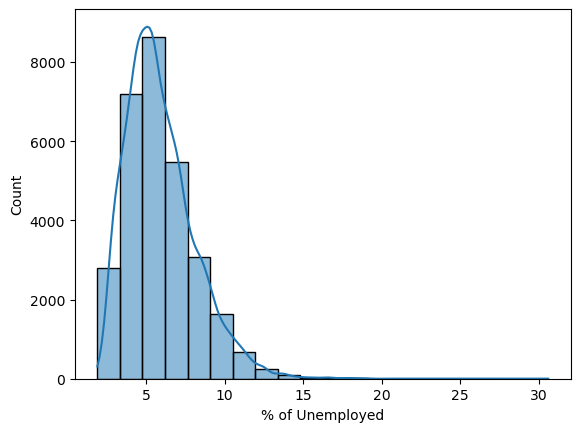

In [15]:
sns.histplot(df['% of Unemployed'], bins=20, kde = True)

In [34]:
df1 = df[df['% of Unemployed'] < 10] 

<AxesSubplot:xlabel='% of Unemployed', ylabel='Count'>

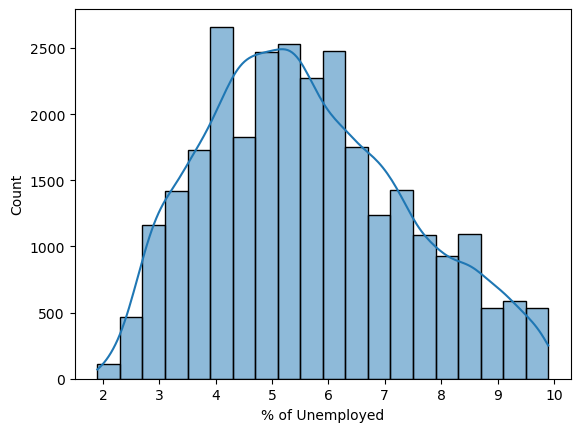

In [35]:
sns.histplot(df1['% of Unemployed'], bins=20, kde = True)

In [18]:
df.shape

(29892, 15)

In [19]:
df1.shape

(24871, 15)

In [20]:
# Checked above for outliers in % of Unemployes, but will keep original version, because it sounds realistic, 
# that 30.6 % of Unemployed existed in a certain State at a certain month.

<AxesSubplot:xlabel='% of Employed', ylabel='Count'>

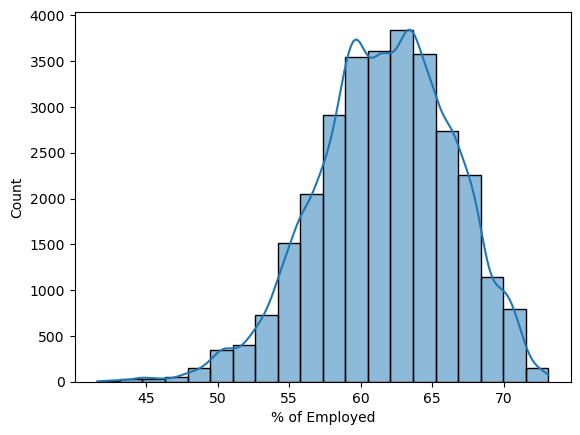

In [21]:
sns.histplot(df['% of Employed'], bins=20, kde = True)

In [22]:
# Will keep % of Employed as it is. 

#### Duplicates check

In [23]:
# No duplicated found

##### Extreme values checks

In [24]:
# See above in consistency ceck

### 4. Plotting a choropleth

In [25]:
df.columns

Index(['FIPS Code', 'State/Area', 'Year', 'Month', 'Month/Year', 'Year/Month',
       'Population', 'Labor Force', 'LF % of Population', 'Employment',
       '% of Employed', 'Unemployment', '% of Unemployed',
       'Unemployment Categories', 'Decades'],
      dtype='object')

In [26]:
df.head()

,FIPS Code,State/Area,Year,Month,Month/Year,Year/Month,Population,Labor Force,LF % of Population,Employment,% of Employed,Unemployment,% of Unemployed,Unemployment Categories,Decades
0,1,Alabama,1976,1,1/1976,1976/1,2605000,1484555,57.0,1386023,53.2,98532,6.6,Mid Unemployment,1970s
1,2,Alaska,1976,1,1/1976,1976/1,232000,160183,69.0,148820,64.1,11363,7.1,Mid Unemployment,1970s
2,4,Arizona,1976,1,1/1976,1976/1,1621000,964120,59.5,865871,53.4,98249,10.2,High Unemployment,1970s
3,5,Arkansas,1976,1,1/1976,1976/1,1536000,889044,57.9,824395,53.7,64649,7.3,Mid Unemployment,1970s
4,6,California,1976,1,1/1976,1976/1,15621000,9774280,62.6,8875685,56.8,898595,9.2,High Unemployment,1970s


In [27]:
data_to_plot = df[['State/Area','% of Unemployed']]

In [28]:
data_to_plot

,State/Area,% of Unemployed
0,Alabama,6.6
1,Alaska,7.1
2,Arizona,10.2
3,Arkansas,7.3
4,California,9.2
...,...,...
29887,Virginia,3.1
29888,Washington,4.5
29889,West Virginia,4.1
29890,Wisconsin,3.0


In [29]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State/Area', '% of Unemployed'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "% of Unemployed").add_to(map)
folium.LayerControl().add_to(map)

map

In [30]:
map.save('plot_data.html')

In [31]:
# Answers for Q8 part 1 : At a glance at the map I can immediately see which states have higher and which have 
# lower Unemployment rate over time since 1976. Therefore two of my research existing questions were answered. 

In [32]:
# Answers for Q8 part 2 : New questions will be following: 

#  Unemployment trend over years since 1974 of top 3 states with highest and top 3 states with lowest unemployment rate?
#  Which states reflect the economic crises at most and which states reflect wealth over time?